In [1]:
# Lo primero que hacemos es importar todas las librerias necesarias.
#importamos librerias para tratamiento de datos
import numpy as np
import pandas as pd
import re
import math as mat

#importamos librerias la visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# Abrimos el dataset y hacemos un chequeo rápido para saber cantidad de registros y miramos la composición del mismo.
filename = "../../dataset/properati.csv"
data = pd.read_csv(filename)

display(data.sample(n=6))
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
80008,80008,sell,house,Lomas de Zamora,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,"-34.7561801,-58.4118804",-34.756180,...,180.0,1166.666667,1166.666667,NaN,NaN,NaN,http://www.properati.com.ar/1awb0_venta_casa_l...,"chalet en dos plantas con gge ,hall de recepci...",Casa en Lomas de Zamora Oeste,https://thumbs4.properati.com/6/sYP_eQRHM4C4EP...
32381,32381,sell,PH,Villa Devoto,|Argentina|Capital Federal|Villa Devoto|,Argentina,Capital Federal,3427451.0,"-34.591624,-58.51921",-34.591624,...,30.0,NaN,3000.000000,2.0,1.0,NaN,http://www.properati.com.ar/186wi_venta_ph_vil...,Corredor Responsable: Uno Bienes Raices SRL - ...,MONOAMBIENTE NO ES APTO CRÉDITO JARDÍN Y PARRILLA,https://thumbs4.properati.com/0/-CSJHwdJZDY8wP...
119849,119849,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.0146191,-57.5437094",-38.014619,...,136.0,3225.677419,3676.323529,NaN,3.0,NaN,http://www.properati.com.ar/1ch6v_venta_depart...,ESPECTACULAR DEPARTAMENTO 3 AMB EN VENTA - ZON...,ESPECTACULAR DEPARTAMENTO 3 AMB EN VENTA - ZON...,https://thumbs4.properati.com/4/Ksvfhaj9arj2JC...
116947,116947,sell,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4244888454,-58.6597014121",-34.424489,...,1.0,NaN,215000.000000,NaN,3.0,NaN,http://www.properati.com.ar/1ccwi_venta_depart...,"Departamento tres ambientes, planta baja con j...","Departamento en venta en complejo El Palmar, N...",https://thumbs4.properati.com/6/lK0tcPUaj5GOCt...
20135,20135,sell,house,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,Argentina,Buenos Aires Costa Atlántica,3429971.0,"-37.0837219021,-56.8350678145",-37.083722,...,250.0,377.777778,1360.000000,NaN,NaN,NaN,http://www.properati.com.ar/17bop_venta_casa_p...,CODIGO: 2714-370 ubicado en: etoneo - Publica...,Venta Casa Zona Norte,https://thumbs4.properati.com/5/z7UbmajPcumnba...
15590,15590,sell,apartment,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3429617.0,"-34.647038,-58.5754454",-34.647038,...,37.0,1800.000000,1945.945946,1.0,1.0,NaN,http://www.properati.com.ar/16vgy_venta_depart...,Venta de Departamento 1 AMBIENTE en Ramos Mejí...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/0/rj68uOurMXFihM...


(Cantidad de Filas, Cantidad de columnas) -> (121220, 26)


In [3]:
# Columna surface_covered_in_m2: revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.surface_covered_in_m2.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.surface_covered_in_m2.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['surface_covered_in_m2']).size().reset_index(name='count'))

Cantidad de registros con NaN: 19907
Porcentaje de registros con NaN: 16.422207556508827
Contamos cantidad de registros unicos:
     surface_covered_in_m2  count
0                      0.0      2
1                      1.0    367
2                      2.0     12
3                      3.0      7
4                      4.0     10
..                     ...    ...
990                30000.0      1
991                35000.0      1
992                38240.0      1
993                49000.0      1
994               187000.0      1

[995 rows x 2 columns]


<AxesSubplot:xlabel='state_name'>

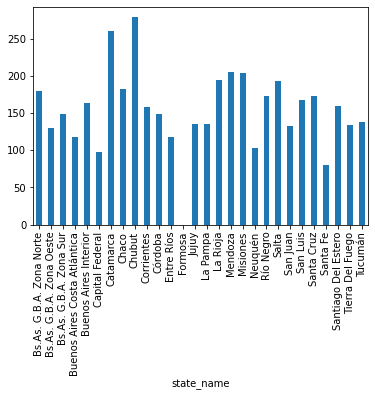

In [4]:
#graficamos el dato por Estado con el fin de observar los rangos de areas de superficie cubierta. Se observa como en los etados de Catamarca y de Chubut las areas exceden el promedio de los demás estados.
data.groupby('state_name')['surface_covered_in_m2'].mean().plot.bar()

In [5]:
data.surface_covered_in_m2.describe()

count    101313.000000
mean        133.050181
std         724.351479
min           0.000000
25%          45.000000
50%          75.000000
75%         150.000000
max      187000.000000
Name: surface_covered_in_m2, dtype: float64

# Detalle de análisis de columnas:
* `surface_covered_in_m2 ` -> Esta columna tiene 19.907 datos nulos o su equivalente 16,42%. Esta variable se emplea para calcular el precio por m2, tomando como base el precio aprox en U$D asi que es una columna relevante. Tiene un valor máximo de 187.000 metros cuadrados valor que se aleja de la media de 133 metros cuadrados.

Esta columna podriamos completarla extrayendo datos de las columnas title y description, tambien calculando el valor tomando el precio en USD y el valor del metro cuadrado 

### Detalle de valores extremos en la  columna `surface_covered_in_m2`:

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar especialmente el area de un apartamento cuya area sobrepasa los 180.000 metros cuadrados.

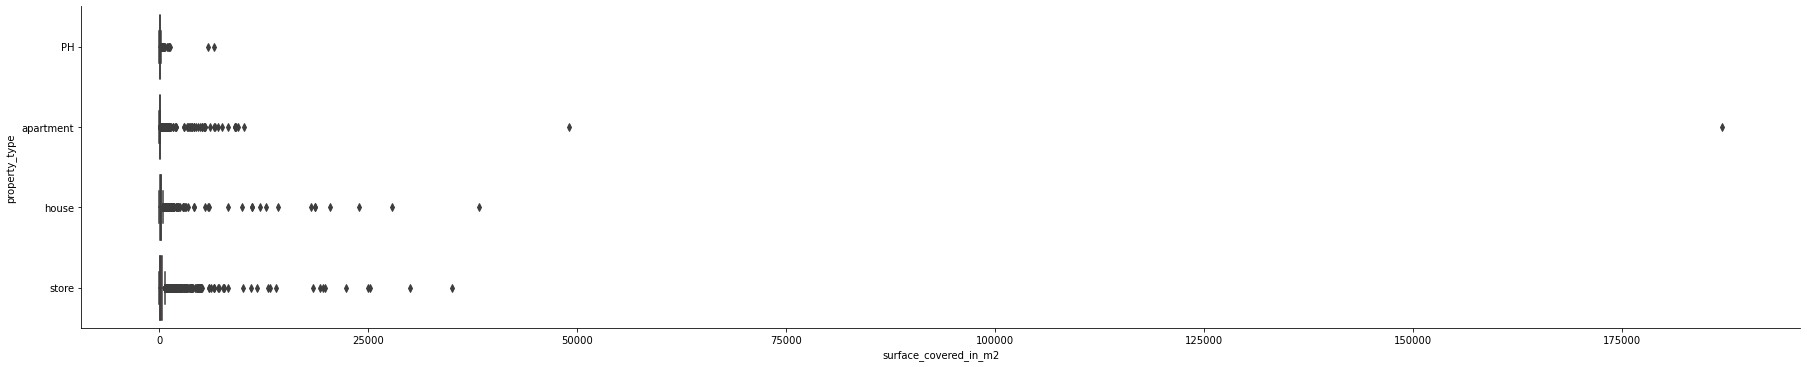

In [6]:
sns.catplot(data=data, x= 'surface_covered_in_m2', y="property_type", kind="box", height=5, aspect=5,)


### Regex para rellenar la columna `surface_covered_in_m2`:

Vamos a extraer datos de las columnas title y description para extraer esta información, para ello tomaremos las diferentes denominaciónes de metros cuadrados: (m,M,mts, Mts, metros, Metros, METROS), tambien se emplean las terminaciones despues del número 2 (c,cub,cubiertos)

In [7]:
# Buscamos superficies cubiertas en metros cuadrado en los titulos y en la descripción

#el area más pequeña es de 1 m2, 161 aptos, 146 casas, deberiamos sacar el dato para aquellas que sean null o tengan menos de 10 m2 trae a la base m2, debemos eliminarlos y transformar . a , ???

data[['description', 'title']] = data[['description', 'title']].apply(lambda x: x.astype(str))

patron = r'([0-9]*\.?\,?[0-9]*)\s?[m|M|mts|Mts|metros|Metros|METROS]\.?\S*2\S*[c|cub|cubiertos]'

regex = re.compile(patron, flags = re.IGNORECASE)

superficie_cubierta_titulo=data['title'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['surface_covered_in_m2'].fillna(superficie_cubierta_titulo, inplace=True)

superficie_cubierta_descripcion=data['description'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['surface_covered_in_m2'].fillna(superficie_cubierta_descripcion, inplace=True)

print (data.isna().sum()/data.shape[0]*100)
print (f'entradas: {data.shape[0]}')

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         15.808447
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.000000
title                          0.000000


In [9]:
#luego de aplicar el regex se logran recucir el porcentaje de nans al pasar del 16.42% al 15.80%.
print (f'% de valores nulos que quedan luego de aplicar regex: {data.surface_covered_in_m2.isna().sum()/data.surface_covered_in_m2.shape[0]*100}')
print (f'entradas: {data.surface_covered_in_m2.shape[0]}')

% de valores nulos que quedan luego de aplicar regex: 15.808447450915692
entradas: 121220


In [10]:
#Vamos a transformar los datos de la columna ya que al extraer datos de regex se convirtieron en tipo object
data['surface_covered_in_m2'] = pd.to_numeric(data['surface_covered_in_m2'],errors = 'coerce')